##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [6]:
%pip install pandas 
%pip install matplotlib
%pip install statsmodels
%pip install seaborn
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.1 MB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 31.4 MB 474 kB/s eta 0:00:011
     |████████████████████████████████| 233 kB 11.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the ke

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [55]:
# Can have as many cells as you want for code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [8]:
###...code...###
df = pd.read_csv(filepath)
df.head
df.shape

# check if global ultimate company = domestic ultimate company means domestic sale = global sale
a = df.loc[df['Global Ultimate Company'] == df['Domestic Ultimate Company']] 
b = a.loc[df['Sales (Domestic Ultimate Total USD)'] != df['Sales (Global Ultimate Total USD)']]

a.shape #(18566, 28) 
b.shape #(18545, 28)

df['Industry'].nunique() # too many industries 580
df['8-Digit SIC Description'].nunique() #2191
df['8-Digit SIC Code'].nunique() #2255
df['SIC Code'].nunique() #582
c = df.loc[df['SIC Code']>1799]
d = c.loc[c['SIC Code']<4000]


df.loc[df['Entity Type']=='Independent']
df.loc[df['Sales (Domestic Ultimate Total USD)'] > df['Sales (Global Ultimate Total USD)']] #2675

df.shape

29182 *  0.01487218



433.99995676000003

In [9]:
## replace the SIC Code with Sector name
new_df = df.copy()

new_df.loc[new_df['SIC Code'].between(100, 999), 'SIC Industry'] = 'Agriculture'

In [10]:
## Replace missing values in Year Found by the median 2008 

new_df['Year Found'].describe()

new_df['Year Found'] = new_df['Year Found'].fillna(2008)


new_df['Year Found'].describe()
df['Year Found'].describe()

len(df.loc[df['Year Found']==2008])
len(new_df.loc[new_df['Year Found']==2008])




1550

Axes(0.125,0.11;0.775x0.77)
                                     Year Found  \
Year Found                             1.000000   
Sales (Domestic Ultimate Total USD)    0.014523   

                                     Sales (Domestic Ultimate Total USD)  
Year Found                                                      0.014523  
Sales (Domestic Ultimate Total USD)                             1.000000  


,Employees (Domestic Ultimate Total),Employees (Single Site)
Employees (Domestic Ultimate Total),1.000000,0.139117
Employees (Single Site),0.139117,1.000000


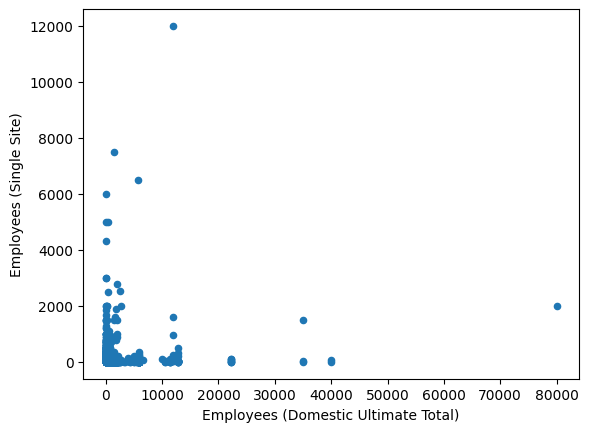

In [11]:
## Explore Employees (Domestic Ultimate Total)

new_df['Employees (Domestic Ultimate Total)'].describe() #mean = 139.764182
# new_df.loc[new_df['Employees (Domestic Ultimate Total)'] == 80000]

a = new_df[new_df['Employees (Domestic Ultimate Total)']<50000] ## remove the two rows where they have 80000 workers

a['Employees (Domestic Ultimate Total)'].describe() #mean = 134.275695

print(df.plot.scatter(x = 'Employees (Domestic Ultimate Total)', y = 'Employees (Single Site)'))

new_df.loc[new_df['Employees (Domestic Ultimate Total)'].isna()][['Employees (Single Site)','Employees (Domestic Ultimate Total)']]

print(df[['Year Found', 'Sales (Domestic Ultimate Total USD)']].corr())

df[['Employees (Domestic Ultimate Total)', 'Employees (Single Site)']].corr()

In [12]:
## Run OLS on Employees (Domestic Ultimate Total) using Emplyees (Single Site)
result = sm.ols(formula="df['Employees (Domestic Ultimate Total)'] ~ df['Employees (Single Site)']", data=df).fit()
print(result.summary())

# the result is significant, so can replace missing values with Employees (Single Site)
new_df['Employees (Domestic Ultimate Total)']= new_df['Employees (Domestic Ultimate Total)'].fillna(new_df['Employees (Single Site)'])

# only five rows where we cannot replace with Employees (Single Site) -> remove these rows? 
new_df.loc[new_df['Employees (Domestic Ultimate Total)'].isna()][['Employees (Single Site)','Employees (Domestic Ultimate Total)']]  


                                        OLS Regression Results                                       
Dep. Variable:     df['Employees (Domestic Ultimate Total)']   R-squared:                       0.019
Model:                                                   OLS   Adj. R-squared:                  0.019
Method:                                        Least Squares   F-statistic:                     329.6
Date:                                       Sat, 27 Jan 2024   Prob (F-statistic):           5.79e-73
Time:                                               22:09:31   Log-Likelihood:            -1.4246e+05
No. Observations:                                      16705   AIC:                         2.849e+05
Df Residuals:                                          16703   BIC:                         2.849e+05
Df Model:                                                  1                                         
Covariance Type:                                   nonrobust                      

,Employees (Single Site),Employees (Domestic Ultimate Total)
7727,NaN,NaN
10768,NaN,NaN
16455,NaN,NaN
20822,NaN,NaN
22660,NaN,NaN


In [13]:
# convert SIC Code into Industrys and add a new column to the new_df
industry_mapping = {
    (101, 999): 'Agriculture',
    (1002, 1499): 'Mining',
    (1500, 1799): 'Construction',
    (2000, 3999): 'Manufacturing',
    (4000, 4999): 'Transportation',
    (5000, 5199): 'Wholesales',
    (5200, 5999): 'Retail',
    (6000, 6799): 'Finance',
    (7000, 8999): 'Services',
    (9000, 9899): 'Public',
    (9900, 10000): 'Others'
}
def map_to_industry(sic_code):
    for code_range, industry in industry_mapping.items():
        if code_range[0] < sic_code <= code_range[1]:
            return industry
    return 'Other'

# Create a new column 'Industry' based on the mapping
new_df['Industrys'] = new_df['SIC Code'].map(map_to_industry)

,Import/Export Status,Sales (Domestic Ultimate Total USD)
Import/Export Status,1.000000,-0.005679
Sales (Domestic Ultimate Total USD),-0.005679,1.000000


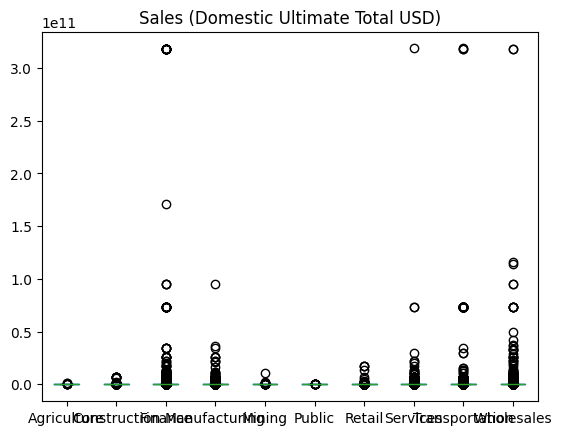

In [14]:
# barplot of sales(domestic) vs industrys
new_df.plot.box(by = 'Industrys',column = 'Sales (Domestic Ultimate Total USD)')
#test correlation between 'import/export status' and 'sales (domestic ultimate total)'
df_import = new_df.copy()

# Simple assumption that BLANK in import/export means NEITHER
#if import/export status is NaN replace with 0, otherwise 1
df_import['Import/Export Status']=df_import['Import/Export Status'].fillna(0).map(lambda x:0 if x==0 else 1)
df_import[['Import/Export Status','Sales (Domestic Ultimate Total USD)']].corr()


# To do 
# MAKE BARPLOT OF SALES AGAINST IMPORT, EXPORT, IMPORT/EXPORT, and NAN 


Sales (Domestic Ultimate Total USD)    Axes(0.125,0.11;0.775x0.77)
dtype: object

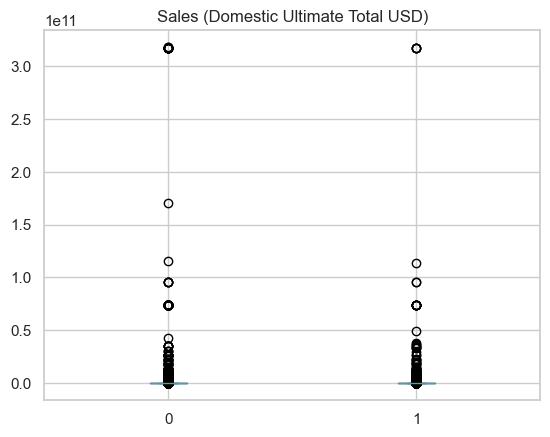

In [38]:
df2 = new_df.dropna(subset=['Sales (Domestic Ultimate Total USD)'])
df_import['Import/Export Status'] = df_import['Import/Export Status'].fillna(0)
df_import.plot.box(by = 'Import/Export Status',column = 'Sales (Domestic Ultimate Total USD)')

# Create a bar plot
#plt.figure(figsize=(10, 6))
#sns.barplot(x='Import/Export Status', y='Sales (Domestic Ultimate Total USD)', data=df_import, ci=None)
#plt.title('Sales against Import/Export Status')
#plt.xlabel('Import/Export Status')
#plt.ylabel('Sales (Domestic Ultimate Total USD)')
#plt.show()

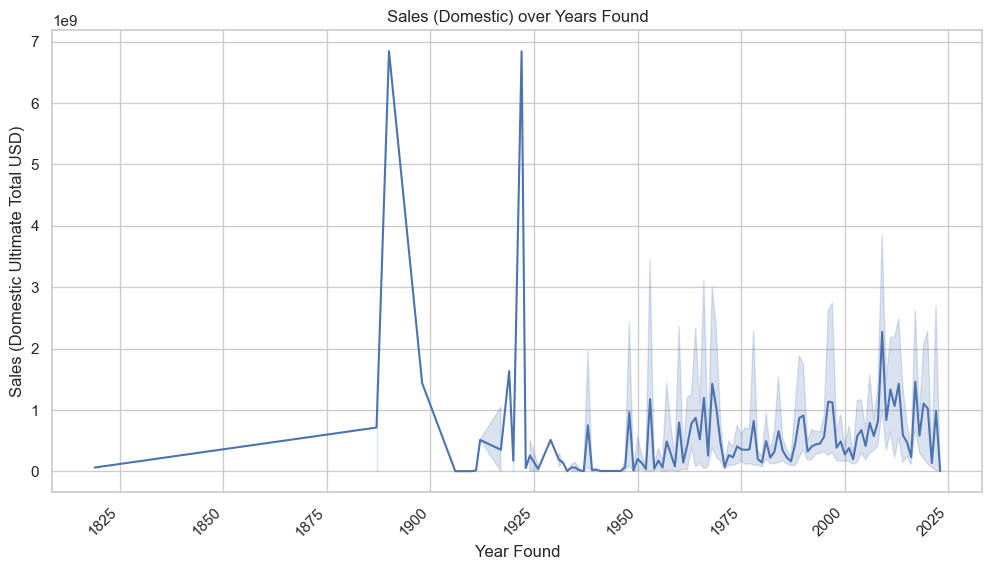

In [40]:
df_filtered = new_df.dropna(subset=['Sales (Domestic Ultimate Total USD)', 'Year Found'])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year Found', y='Sales (Domestic Ultimate Total USD)', data=df_filtered)
plt.title('Sales (Domestic) over Years Found')
plt.xlabel('Year Found')
plt.ylabel('Sales (Domestic Ultimate Total USD)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

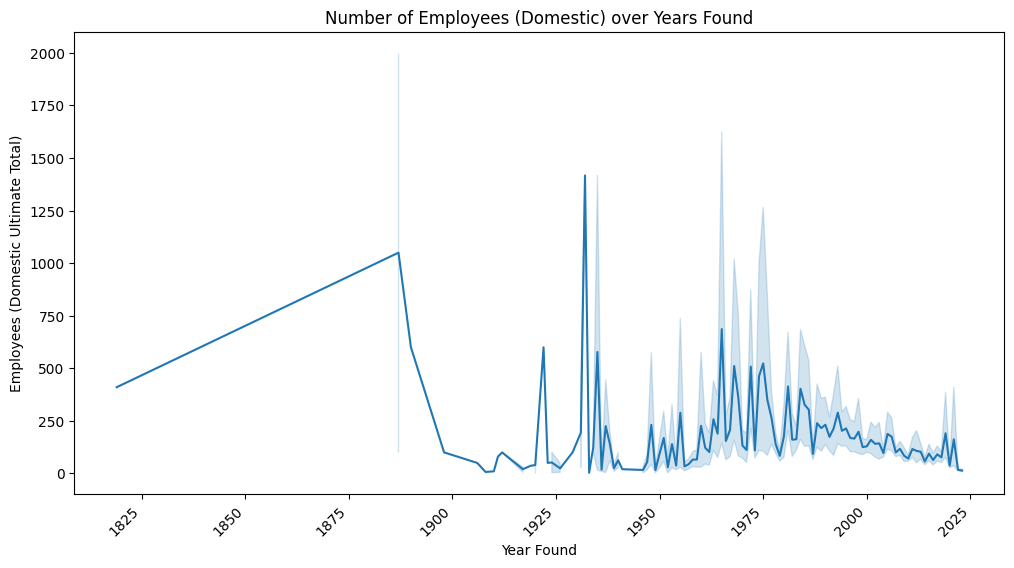

In [26]:
df_filtered2 = new_df.dropna(subset=['Employees (Domestic Ultimate Total)', 'Year Found'])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year Found', y='Employees (Domestic Ultimate Total)', data=df_filtered2)
plt.title('Number of Employees (Domestic) over Years Found')
plt.xlabel('Year Found')
plt.ylabel('Employees (Domestic Ultimate Total)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

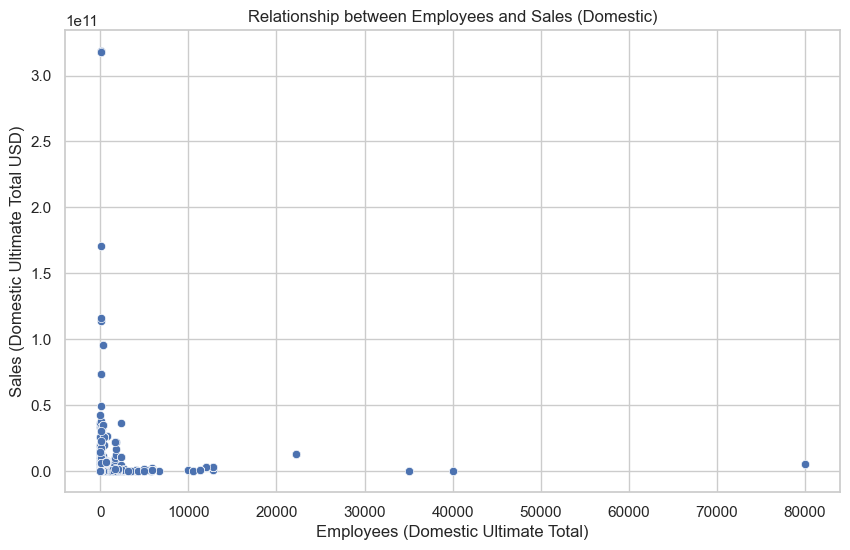

In [53]:
# Drop rows with missing values in the relevant columns
df_filtered3 = new_df.dropna(subset=['Employees (Domestic Ultimate Total)', 'Sales (Domestic Ultimate Total USD)'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employees (Domestic Ultimate Total)', y='Sales (Domestic Ultimate Total USD)', data=df)
plt.title('Relationship between Employees and Sales (Domestic)')
plt.xlabel('Employees (Domestic Ultimate Total)')
plt.ylabel('Sales (Domestic Ultimate Total USD)')
plt.show()

In [35]:

variables_to_remove = [
    'LATITUDE', 'LONGITUDE', 'AccountID', 'Company', '8-Digit SIC Code',
    '8-Digit SIC Description', 'Company Description', 'Company Status (Active/Inactive)', 'SIC Code',
    'Fiscal Year End', 'Is Global Ultimate', 'Global Ultimate Company','Parent Company', 'Parent Country', 'Import/Export Status', 'Domestic Ultimate Company', 'SIC Industry',
    'Global Ultimate Country', 'Industry', 'Square Footage', 'Employees (Single Site)', 'Sales (Global Ultimate Total USD)', 'Employees (Global Ultimate Total)'
]
df = new_df.drop(variables_to_remove, axis=1)
df.head()
#df.info()

,Year Found,Entity Type,Ownership Type,Employees (Domestic Ultimate Total),Sales (Domestic Ultimate Total USD),Is Domestic Ultimate,Industrys
0,2020.0,Subsidiary,Private,25.0,2.209224e+06,0.0,Services
1,2015.0,Subsidiary,Private,100.0,7.093536e+09,0.0,Transportation
2,1993.0,Subsidiary,Private,4.0,1.026308e+06,1.0,Finance
3,2006.0,Subsidiary,Private,100.0,7.339898e+10,0.0,Finance
4,2006.0,Parent,Private,4.0,4.322130e+05,1.0,Finance


In [32]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numerical_df.corr()

# Assuming correlation_matrix is your correlation matrix
correlation_df = pd.DataFrame(correlation_matrix)

# Print or use the correlation DataFrame as needed
correlation_df

,SIC Code,Year Found,Employees (Domestic Ultimate Total),Sales (Domestic Ultimate Total USD),Is Domestic Ultimate
SIC Code,1.000000,0.194648,-0.022091,-0.011493,0.016096
Year Found,0.194648,1.000000,-0.045954,0.014334,0.074757
Employees (Domestic Ultimate Total),-0.022091,-0.045954,1.000000,0.016912,-0.060300
Sales (Domestic Ultimate Total USD),-0.011493,0.014334,0.016912,1.000000,-0.054561
Is Domestic Ultimate,0.016096,0.074757,-0.060300,-0.054561,1.000000


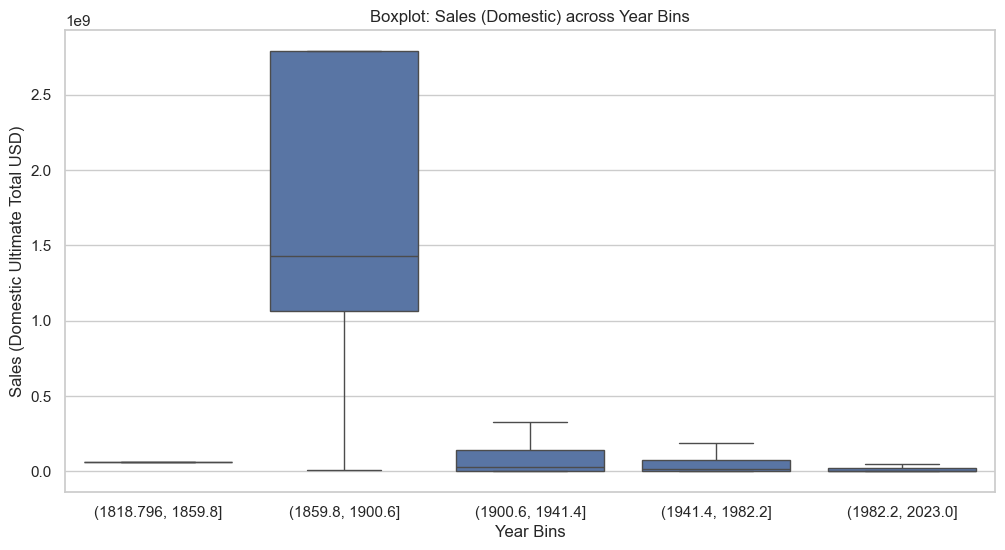

In [47]:

# Create bins for 'Year Found'
df['Year Bins'] = pd.cut(df['Year Found'], bins=5)

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year Bins', y='Sales (Domestic Ultimate Total USD)', data=df, showfliers=False)
plt.title('Boxplot: Sales (Domestic) across Year Bins')
plt.xlabel('Year Bins')
plt.ylabel('Sales (Domestic Ultimate Total USD)')
plt.show()

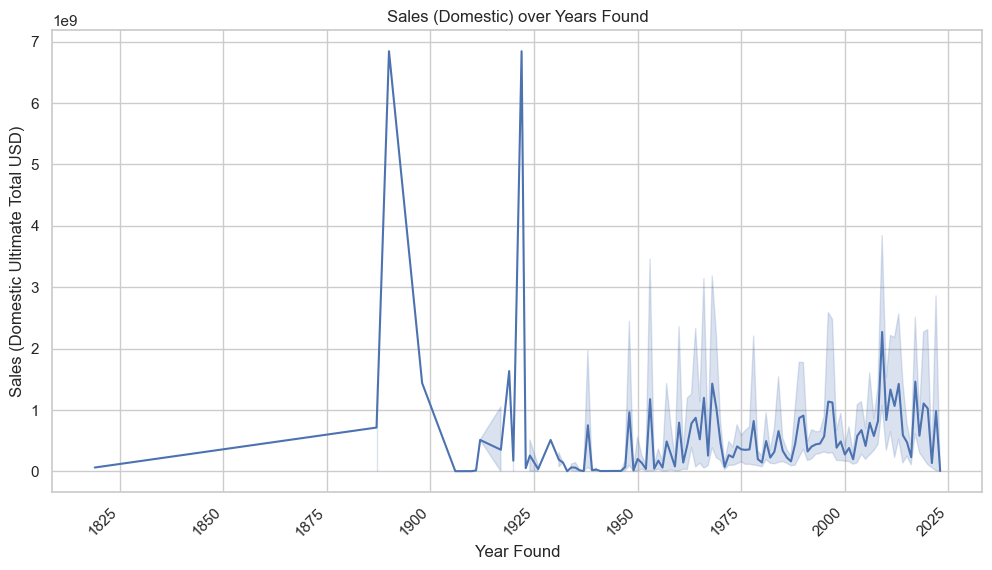

In [42]:
df_filtered = df.dropna(subset=['Sales (Domestic Ultimate Total USD)', 'Year Found'])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year Found', y='Sales (Domestic Ultimate Total USD)', data=df)
plt.title('Sales (Domestic) over Years Found')
plt.xlabel('Year Found')
plt.ylabel('Sales (Domestic Ultimate Total USD)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

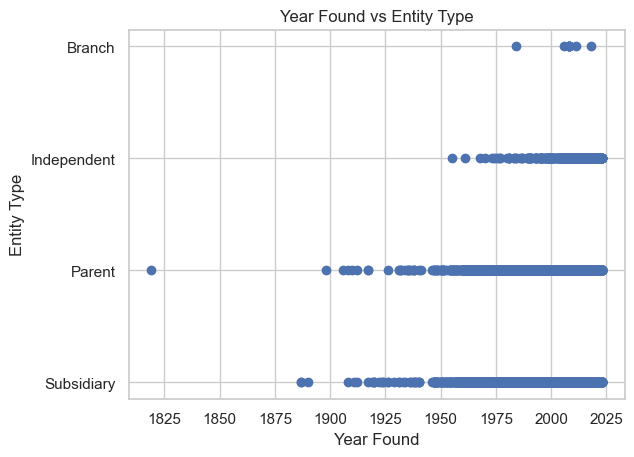

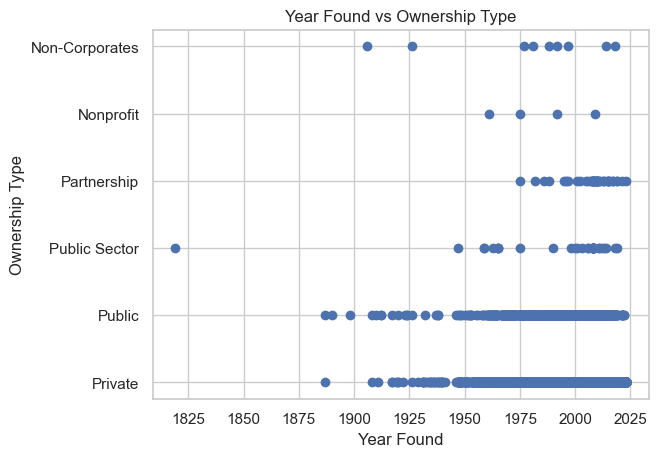

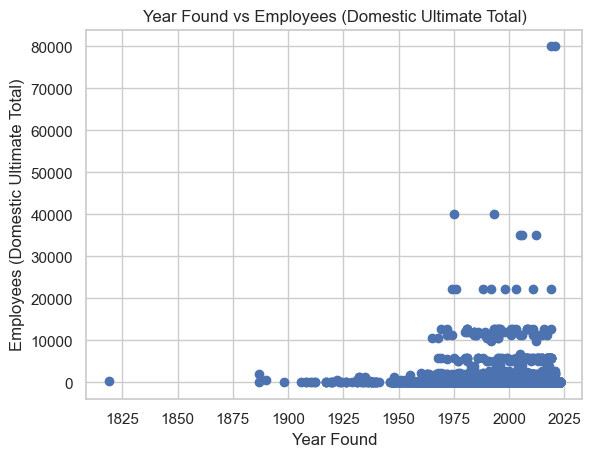

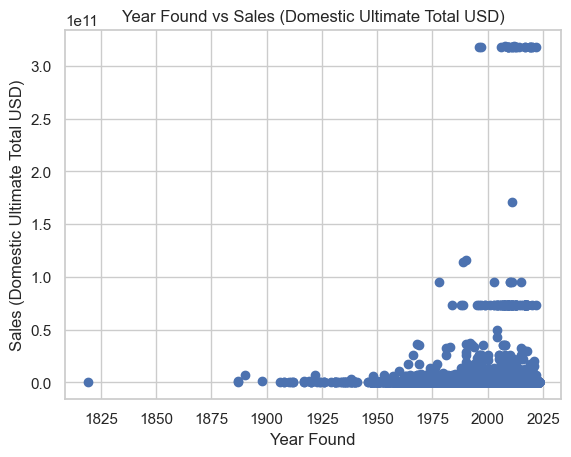

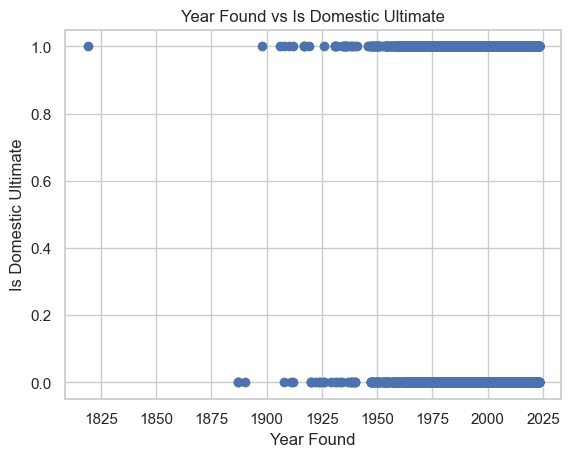

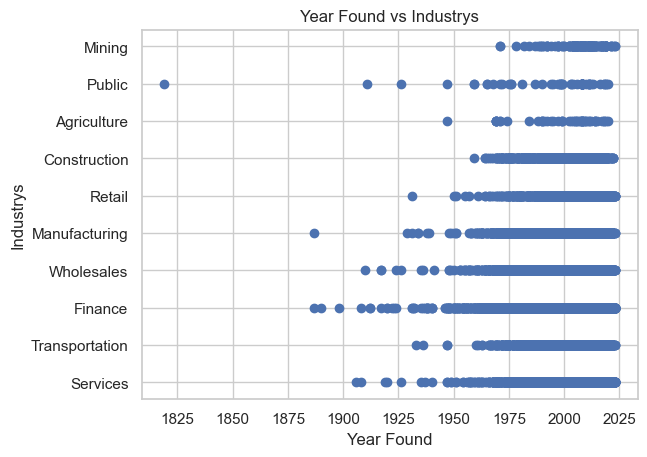

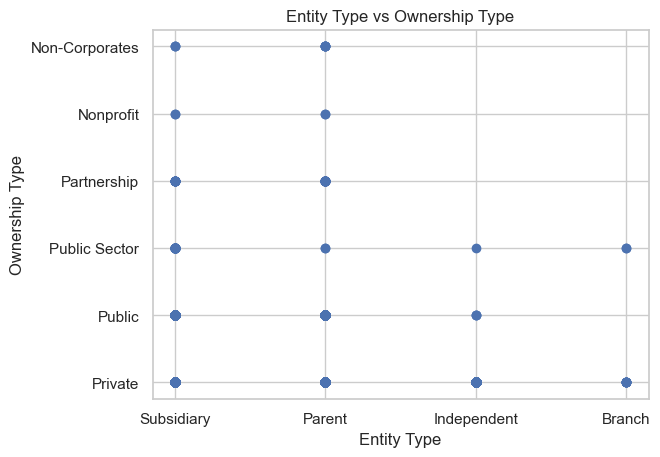

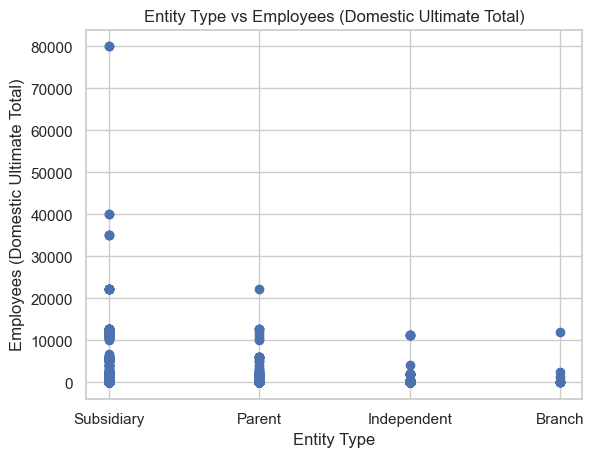

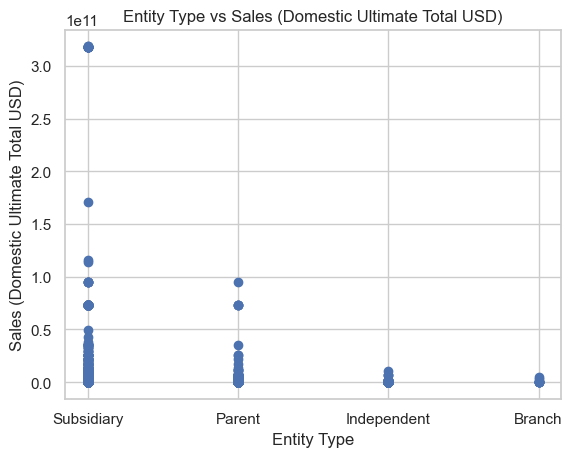

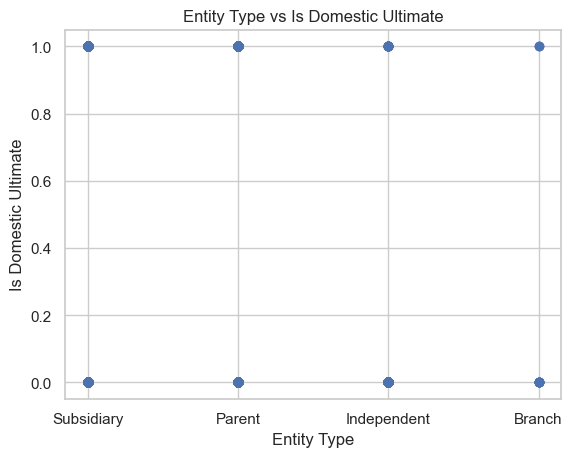

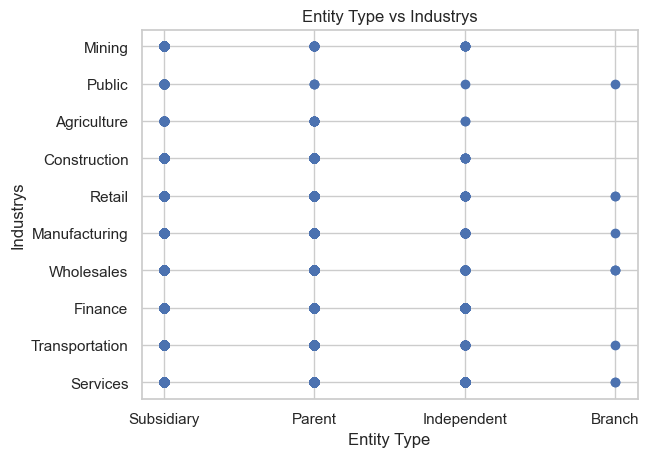

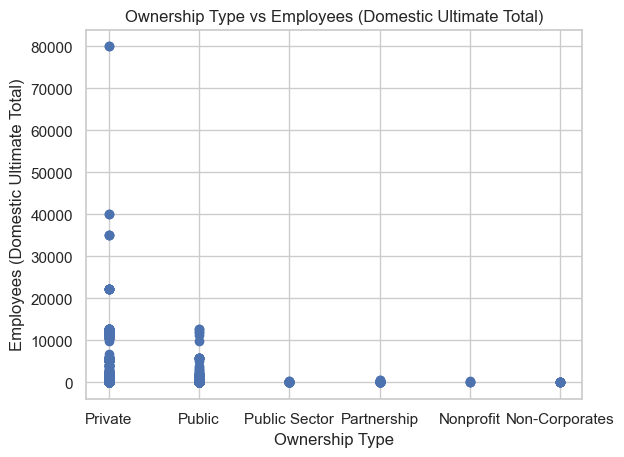

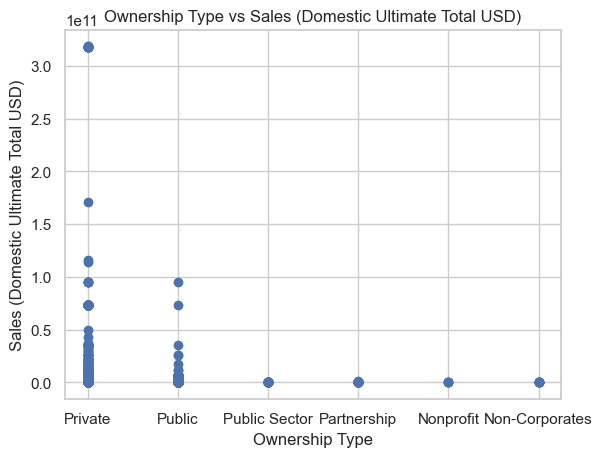

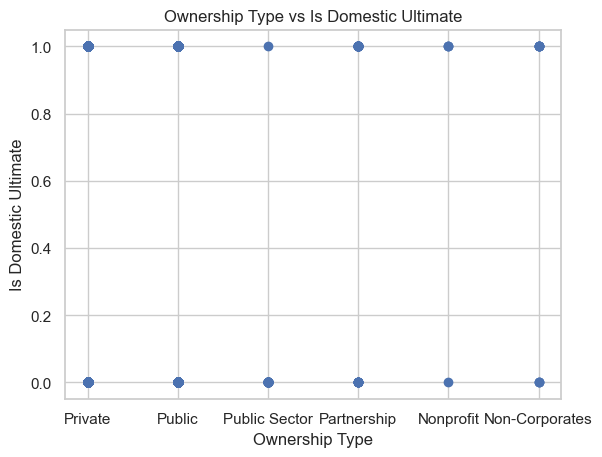

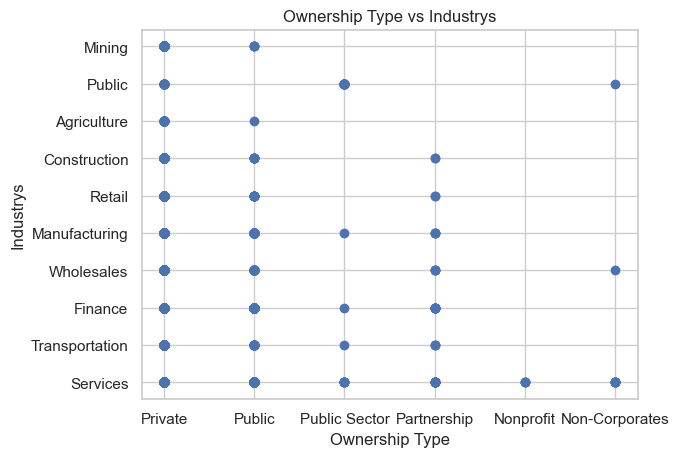

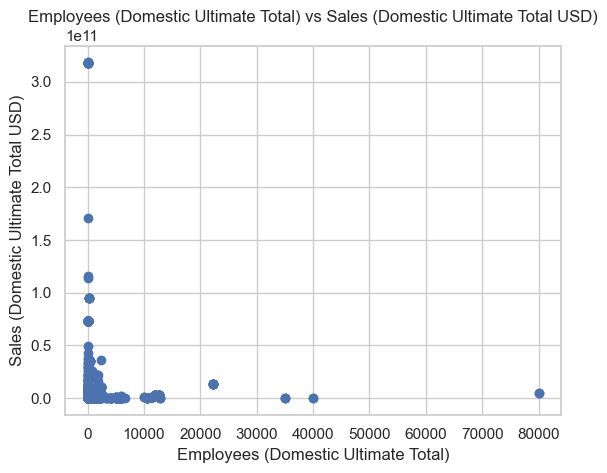

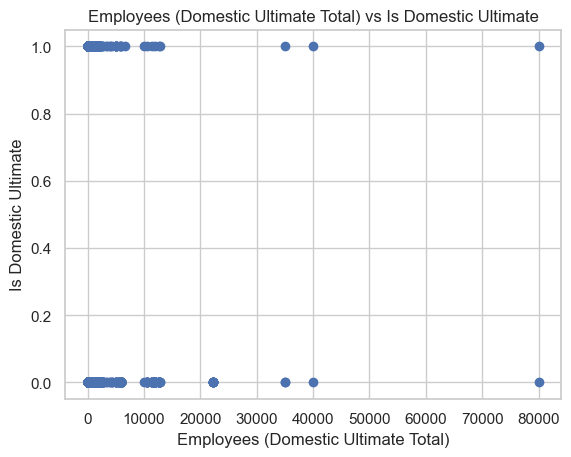

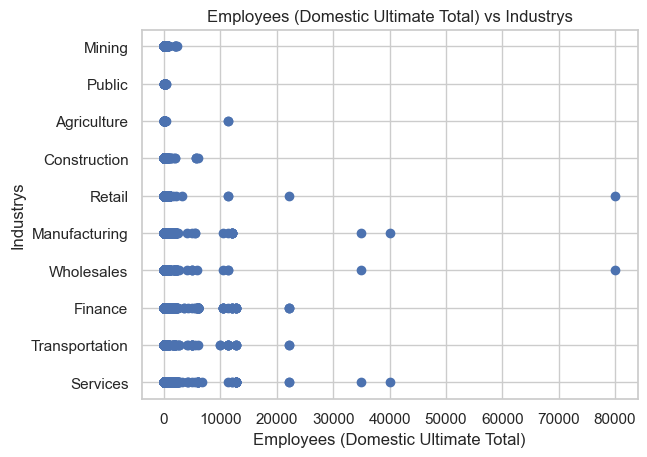

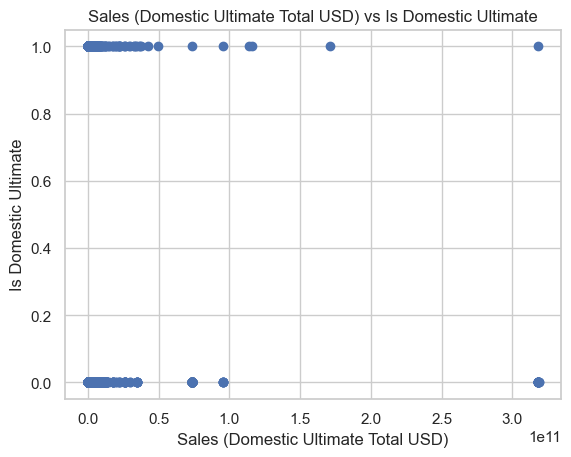

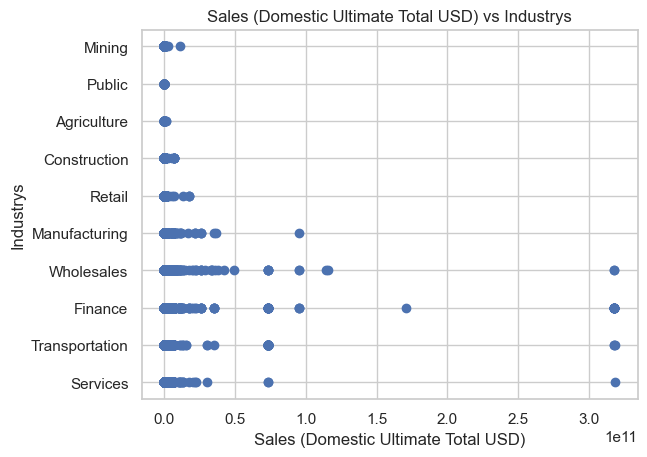

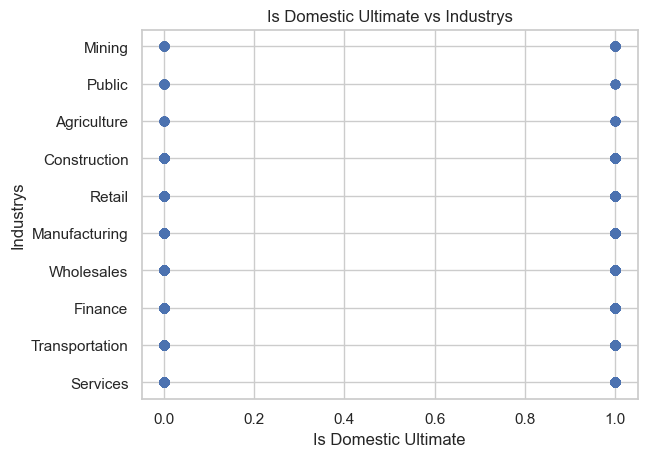

In [41]:
#To do -> look at the error in plots 

variables = df.columns

# Creating scatter plots
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        try:
            plt.scatter(df[variables[i]], df[variables[j]])
            plt.title(f'{variables[i]} vs {variables[j]}')
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.show()
        except Exception as e:
            print(f"Error plotting {variables[i]} vs {variables[j]}: {e}")


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [17]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''

    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [18]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

[]


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!